# Retention Study - Figuring Out Which Employees May Quit
### Loading our Main HR Database Records

In [83]:
import pandas as pd

# Uncomment this line if using this notebook locally
#hr_df = pd.read_csv('./data/employee_retention/hr_data.csv') 

file_name = "https://raw.githubusercontent.com/soumyabrataroy/which_employee_may_quit-/main/hr_data.csv"
hr_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to 
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply 
# put dataframe_name.head(10)
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [84]:
# View the bottom 5 rows
hr_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [85]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [86]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [87]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [88]:
# How many rows are in our dataset?
len(hr_df)

14999

In [89]:
# What about how many columns?
len(hr_df.columns)

9

In [90]:
hr_df.shape

(14999, 9)

### Loading our Evaluation and Employee Satisfaction Data

In [91]:
# Uncomment this line if using this notebook locally
#emp_satis_eval = pd.read_excel ('./data/employee_retention/employee_satisfaction_evaluation.xlsx') 

file_name = "https://github.com/soumyabrataroy/which_employee_may_quit-/raw/main/employee_satisfaction_evaluation.xlsx"
emp_satis_eval = pd.read_excel(file_name)

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [92]:
emp_satis_eval.shape

(14999, 3)

### Merge or Join Tables

In [93]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


### Is our dataset good? Are there missing values?

In [94]:
#main_df.isnull()
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


### Let's fill in the missing blanks with the aveage values

In [95]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
main_df['last_evaluation'].fillna(main_df['last_evaluation'].mean(), inplace=True)

/tmp/ipykernel_1796/3693788641.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['satisfaction_level'].fillna(main_df['satisfaction_level'].mean(), inplace=True)
/tmp/ipykernel_1796/3693788641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [97]:
# main_df.fillna(main_df.mean(), inplace=True)
# main_df.head()

In [98]:
#main_df[main_df.employee_id == 3794]
main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,0.61283,0.716125


In [99]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [100]:
# Removing employee ID
main_df_final = main_df.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [101]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
department,,,,,,,,,
IT,4683,248119,4256,164,273,3,mediummediummediummediummediummediumlowlowlowl...,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,mediummediummediummediummediummediummediummedi...,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,lowlowlowlowmediummediummediumlowmediummediumm...,446.68283,550.706125
hr,2701,146828,2480,89,215,15,lowlowlowlowmediummediummediumhighmediummedium...,442.53566,524.006125
management,2432,126787,2711,103,91,69,mediumlowlowlowlowlowlowmediumlowmediumlowlowl...,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,mediumlowlowlowlowlowlowlowlowlowlowlowlowlowl...,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,mediummediummediummediummediumhighlowmediummed...,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,lowmediummediumlowlowlowlowlowlowlowlowlowlowl...,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,lowlowlowlowlowlowlowlowlowlowlowlowlowlowlowl...,1377.90849,1611.534499


In [102]:
main_df_final.groupby('department').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
main_df_final['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

In [103]:
main_df_final['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Displaying Your Correlation Matrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


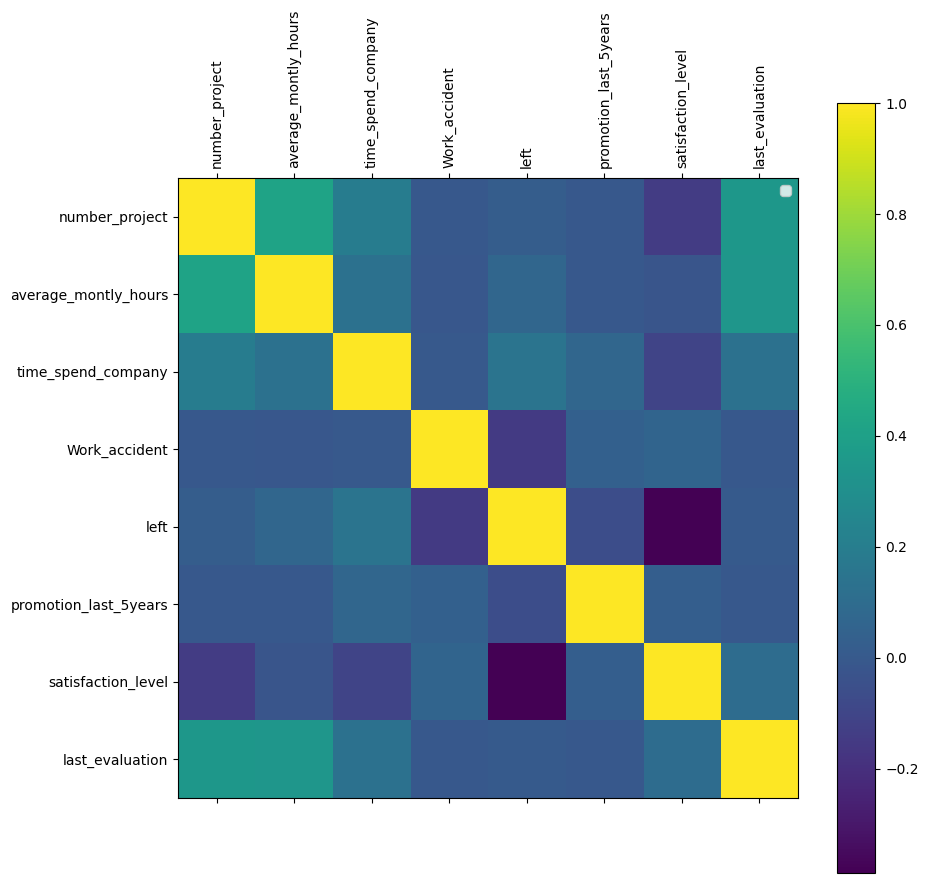

In [105]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final.drop(['department','salary'], axis = 1))

## Preparing out  Dataset for ML

In [106]:
# Perform One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,False,False,False,False,False,False,True,False,False,True,False
1,5,262,6,0,1,0,0.80,0.86,False,False,False,False,False,False,True,False,False,False,True
2,7,272,4,0,1,0,0.11,0.88,False,False,False,False,False,False,True,False,False,False,True
3,5,223,5,0,1,0,0.72,0.87,False,False,False,False,False,False,True,False,False,True,False
4,2,159,3,0,1,0,0.37,0.52,False,False,False,False,False,False,True,False,False,True,False


In [107]:
# How many columns do we now have?

len(main_df_final.columns)

19

In [108]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [109]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,False,False,False,False,False,False,True,False,False,True,False
1,5,262,6,0,1,0,0.80,0.86,False,False,False,False,False,False,True,False,False,False,True
2,7,272,4,0,1,0,0.11,0.88,False,False,False,False,False,False,True,False,False,False,True
3,5,223,5,0,1,0,0.72,0.87,False,False,False,False,False,False,True,False,False,True,False
4,2,159,3,0,1,0,0.37,0.52,False,False,False,False,False,False,True,False,False,True,False


In [110]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  bool   
 9   department_accounting   14999 non-null  bool   
 10  department_hr           14999 non-null  bool   
 11  department_management   14999 non-null  bool   
 12  department_marketing    14999 non-null  bool   
 13  department_product_mng  14999 non-null  bool   
 14  department_sales        14999 non-null

## Preparing our Dataset for Machine Learning

In [111]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [112]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [113]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

In [114]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.978451,1.161892,-1.032740,-0.410650,-0.142864,0.995423,0.084494,-0.236920,-0.233311,-0.220548,-0.214059,-0.238039,-0.254573,-0.621883,-0.420735,2.141856,-0.979914,1.161365
1,-0.651757,-1.387647,-1.032740,2.435166,-0.142864,0.428968,-0.032557,-0.236920,-0.233311,-0.220548,-0.214059,-0.238039,-0.254573,-0.621883,-0.420735,2.141856,1.020498,-0.861055
2,-0.651757,0.037686,-1.032740,-0.410650,-0.142864,0.671735,0.435644,-0.236920,-0.233311,-0.220548,-0.214059,-0.238039,-0.254573,1.608019,-0.420735,-0.466885,1.020498,-0.861055
3,2.608659,1.061516,0.345866,-0.410650,-0.142864,-2.120082,1.196471,-0.236920,-0.233311,-0.220548,-0.214059,-0.238039,-0.254573,1.608019,-0.420735,-0.466885,-0.979914,1.161365
4,0.163347,-1.267197,-0.343437,-0.410650,-0.142864,-0.056565,-0.910433,4.220831,-0.233311,-0.220548,-0.214059,-0.238039,-0.254573,-0.621883,-0.420735,-0.466885,1.020498,-0.861055


In [115]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,-1.076067e-16,2.446530e-16,1.488898e-16,-1.015158e-17,-5.346497e-17,3.215275e-14,2.976578e-14,-6.767718e-18,-6.429332e-18,5.414175e-17,3.722245e-18,-2.165670e-17,3.282343e-17,-3.079312e-17,-5.075789e-17,-4.906596e-18,-6.767718e-17,-9.474806e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.466861e+00,-2.110351e+00,-1.032740e+00,-4.106496e-01,-1.428641e-01,-2.120082e+00,-2.080936e+00,-2.369202e-01,-2.333111e-01,-2.205485e-01,-2.140591e-01,-2.380392e-01,-2.545728e-01,-6.218833e-01,-4.207350e-01,-4.668848e-01,-9.799140e-01,-8.610554e-01
25%,-6.517571e-01,-9.058446e-01,-3.434368e-01,-4.106496e-01,-1.428641e-01,-7.039432e-01,-9.104333e-01,-2.369202e-01,-2.333111e-01,-2.205485e-01,-2.140591e-01,-2.380392e-01,-2.545728e-01,-6.218833e-01,-4.207350e-01,-4.668848e-01,-9.799140e-01,-8.610554e-01
50%,1.633469e-01,-2.253980e-02,-3.434368e-01,-4.106496e-01,-1.428641e-01,1.052790e-01,2.596861e-02,-2.369202e-01,-2.333111e-01,-2.205485e-01,-2.140591e-01,-2.380392e-01,-2.545728e-01,-6.218833e-01,-4.207350e-01,-4.668848e-01,-9.799140e-01,-8.610554e-01
75%,9.784509e-01,8.808401e-01,3.458660e-01,-4.106496e-01,-1.428641e-01,8.335790e-01,9.038454e-01,-2.369202e-01,-2.333111e-01,-2.205485e-01,-2.140591e-01,-2.380392e-01,-2.545728e-01,1.608019e+00,-4.207350e-01,-4.668848e-01,1.020498e+00,1.161365e+00
max,2.608659e+00,2.185722e+00,4.481683e+00,2.435166e+00,6.999660e+00,1.561879e+00,1.664672e+00,4.220831e+00,4.286123e+00,4.534151e+00,4.671607e+00,4.200989e+00,3.928150e+00,1.608019e+00,2.376793e+00,2.141856e+00,1.020498e+00,1.161365e+00


## Let's Train a Logistic Regression Model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.13%
[[3175  268]
 [ 671  386]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3443
           1       0.59      0.37      0.45      1057

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



# New Addition (22-Jan-2020)
# Test your model on a single new row of data

In [117]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

/home/sam/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.87817353, 0.12182647]])

### Let's Try a Random Forest Classifer

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.82%
[[3434    9]
 [  44 1013]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3443
           1       0.99      0.96      0.97      1057

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [119]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [120]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [122]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.319021
2,0.183327
0,0.171633
1,0.151934
6,0.129654
3,0.010850
16,0.008459
17,0.004103
15,0.003630
13,0.003563


### Can Deep Learning Make a Difference?

In [40]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

TensorFlow 2.x selected.


In [ ]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [42]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 3s 283us/sample - loss: 0.4282 - accuracy: 0.8181 - val_loss: 0.3110 - val_accuracy: 0.8689
Epoch 2/25
10499/10499 [==============================] - 2s 213us/sample - loss: 0.2462 - accuracy: 0.9146 - val_loss: 0.2181 - val_accuracy: 0.9307
Epoch 3/25
10499/10499 [==============================] - 2s 208us/sample - loss: 0.1912 - accuracy: 0.9413 - val_loss: 0.1869 - val_accuracy: 0.9411
Epoch 4/25
10499/10499 [==============================] - 2s 207us/sample - loss: 0.1735 - accuracy: 0.9466 - val_loss: 0.1761 - val_accuracy: 0.9462
Epoch 5/25
10499/10499 [==============================] - 2s 203us/sample - loss: 0.1668 - accuracy: 0.9503 - val_loss: 0.1736 - val_accuracy: 0.9480
Epoch 6/25
10499/10499 [==============================] - 2s 211us/sample - loss: 0.1636 - accuracy: 0.9511 - val_loss: 0.1700 - val_accuracy: 0.9489
Epoch 7/25
10499/10499 [===========================

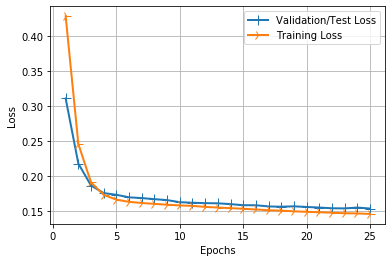

In [44]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

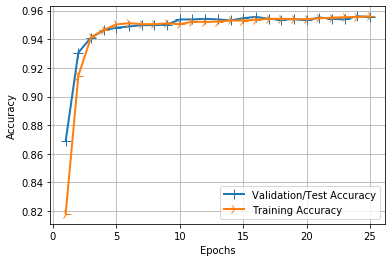

In [45]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [46]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3302   89]
 [ 112  997]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3391
           1       0.92      0.90      0.91      1109

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# Let's a Deeper Model

In [47]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [49]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 4s 402us/sample - loss: 0.6367 - accuracy: 0.9128 - val_loss: 0.2812 - val_accuracy: 0.9473
Epoch 2/25
10499/10499 [==============================] - 4s 344us/sample - loss: 0.2767 - accuracy: 0.9391 - val_loss: 0.2572 - val_accuracy: 0.9442
Epoch 3/25
10499/10499 [==============================] - 4s 346us/sample - loss: 0.2598 - accuracy: 0.9414 - val_loss: 0.2463 - val_accuracy: 0.9424
Epoch 4/25
10499/10499 [==============================] - 4s 348us/sample - loss: 0.2535 - accuracy: 0.9420 - val_loss: 0.2430 - val_accuracy: 0.9511
Epoch 5/25
10499/10499 [==============================] - 4s 341us/sample - loss: 0.2500 - accuracy: 0.9436 - val_loss: 0.2401 - val_accuracy: 0.9480
Epoch 6/25
10499/10499 [==============================] - 4s 341us/sample - loss: 0.2460 - accuracy: 0.9432 - val_loss: 0.2288 - val_accuracy: 0.9487
Epoch 7/25
10499/10499 [===========================

In [50]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3323   68]
 [ 152  957]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3391
           1       0.93      0.86      0.90      1109

    accuracy                           0.95      4500
   macro avg       0.94      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500

